In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
df = pd.read_csv('news_dataset.csv')
print("Columns:", df.columns)
print(df.head())

Columns: Index(['label', 'text'], dtype='object')
  label                                               text
0  REAL  Payal has accused filmmaker Anurag Kashyap of ...
1  FAKE  A four-minute-long video of a woman criticisin...
2  FAKE  Republic Poll, a fake Twitter account imitatin...
3  REAL  Delhi teen finds place on UN green list, turns...
4  REAL  Delhi: A high-level meeting underway at reside...


In [23]:
print(df.isnull().sum())

label    0
text     8
dtype: int64


In [24]:
df = df.dropna(subset=['text', 'label'])
df = df[df['text'].str.strip() != '']

In [25]:
print("\nLabel distribution:\n", df['label'].value_counts())


Label distribution:
 label
FAKE    1871
REAL    1850
Name: count, dtype: int64


In [26]:
if df['label'].dtype == 'object':
    df['label'] = df['label'].str.strip().str.upper().map({'REAL':0, 'FAKE':1})
    print("\nMapped labels:\n", df['label'].value_counts())


Mapped labels:
 label
1    1871
0    1850
Name: count, dtype: int64


In [27]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['text'] = df['text'].apply(clean_text)
df = df[df['text'].str.strip() != '']

In [28]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("\nTraining samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 2976
Test samples: 745


In [29]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [30]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9919463087248322

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       384
           1       0.98      1.00      0.99       361

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



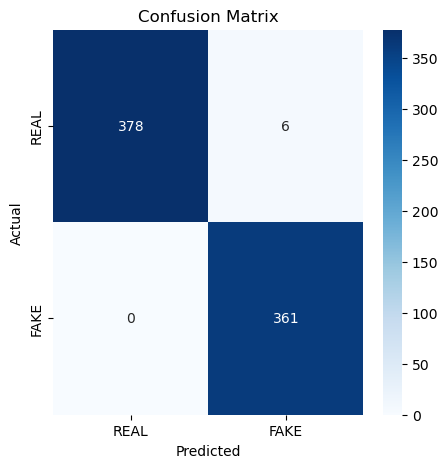

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['REAL','FAKE'], yticklabels=['REAL','FAKE'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vec = vectorizer.transform([cleaned])
    prediction = model.predict(vec)
    return 'FAKE' if prediction[0] == 1 else 'REAL'

In [38]:
sample_news = "Delhi teen finds place on UN green list, turns..."
print("\nSample Prediction:", predict_news(sample_news))


Sample Prediction: REAL
